<a href="https://colab.research.google.com/github/aayushbhurtel/Numerical-Methods/blob/main/BhurtelAayush_CPSMA4413_Lesson6_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 6 Project

Numerical Method CPSMA 441 Prof: Nicholas Jacobs

Member(s): Hoang Tan Truong, Aakriti Khadka, Aayush Bhurtel, Jordan Moreno
 

First we load all the necessary libraries in this project. We keep on adding more libraries when needed.

In [34]:
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pa



For future use, we'll also include Gauss Jordan and the set of data that we've picked is student.csv from Prof. Jacobs Github repo

In [35]:

def addRow(matrx, row, toAdd, multiplier):
    temp = matrx.copy()
    for i in range(len(matrx[row, :])):
        temp[row, i] = temp[row, i] + multiplier*temp[toAdd, i]
    return np.array(temp)

def toLeading1(matrx, row, col):
    temp = matrx.copy()
    temp = np.array(temp, float)
    if (temp[row, col] != 0):
        temp[row, :] = temp[row, :]/temp[row, col]
    return np.array(temp)

def gauss_Jordan(matrix):
  newMatrix = matrix
  for pivot in range(len(matrix)):
    newMatrix = toLeading1(newMatrix,pivot,pivot)
    for column in range(0,pivot):
      newMatrix = addRow(newMatrix,column,pivot,-newMatrix[column,pivot])
    for column in range(pivot+1,len(matrix)):
      newMatrix = addRow(newMatrix,column,pivot,-newMatrix[column,pivot])
  return newMatrix

def function(x):
    return np.log(x+1)




Here is the set data for better visualization 

We load the student dataset from a CSV file using pandas.

In [36]:
data = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Applied_Stats_Jupyter_Notebooks/master/student.csv')

lets display 10 data from the dataset

In [37]:
data.head(10)

,Year,Gender,Smoke,Award,HigherSAT,Exercise,TV,Height,Weight,Siblings,BirthOrder,VerbalSAT,MathSAT,SAT,GPA,Pulse,Piercings
0,Senior,M,No,Olympic,Math,10.0,1.0,71.0,180.0,4,4.0,540,670,1210,3.13,54,0.0
1,Sophomore,F,Yes,Academy,Math,4.0,7.0,66.0,120.0,2,2.0,520,630,1150,2.50,66,3.0
2,FirstYear,M,No,Nobel,Math,14.0,5.0,72.0,208.0,2,1.0,550,560,1110,2.55,130,0.0
3,Junior,M,No,Nobel,Math,3.0,1.0,63.0,110.0,1,1.0,490,630,1120,3.10,78,0.0
4,Sophomore,F,No,Nobel,Verbal,3.0,3.0,65.0,150.0,1,1.0,720,450,1170,2.70,40,6.0
5,Sophomore,F,No,Nobel,Verbal,5.0,4.0,65.0,114.0,2,2.0,600,550,1150,3.20,80,4.0
6,FirstYear,F,No,Olympic,Math,10.0,10.0,66.0,128.0,1,1.0,640,680,1320,2.77,94,8.0
7,Sophomore,M,No,Olympic,Math,13.0,8.0,74.0,235.0,1,1.0,660,710,1370,3.30,77,0.0
8,Junior,F,No,Nobel,Verbal,3.0,6.0,61.0,NaN,2,2.0,550,550,1100,2.80,60,7.0
9,FirstYear,F,No,Nobel,Math,12.0,1.0,60.0,115.0,7,8.0,670,700,1370,3.70,94,2.0


MathSAT and SAT are linearly related since the sum of MathSAT and VerbalSAT is SAT. Here's the graph that has the point of (MathSAT and VerbalSAT) and SAT to see that they are identical.

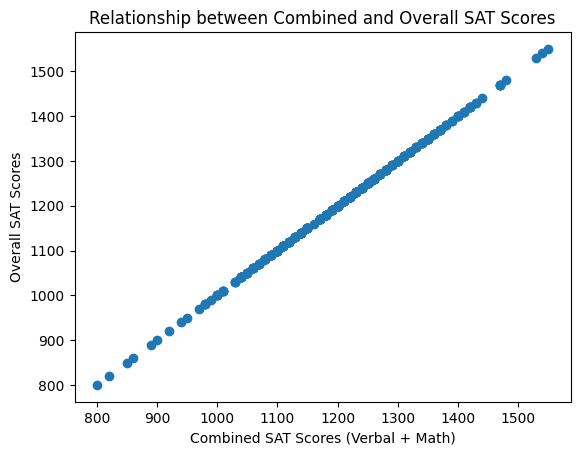

In [38]:
plt.scatter(data['VerbalSAT']+ data['MathSAT'], data['SAT'])
plt.xlabel('Combined SAT Scores (Verbal + Math)')
plt.ylabel('Overall SAT Scores')
plt.title('Relationship between Combined and Overall SAT Scores')
plt.show()

The two rows that we'll focus for now is MathSAT and SAT. Now let's see them in the graph.

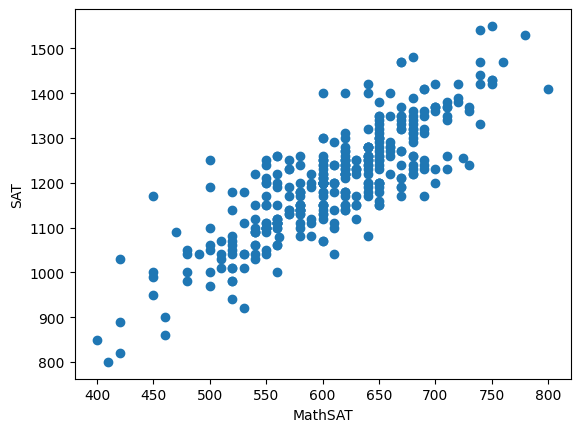

In [39]:
plt.scatter(data['MathSAT'], data['SAT'])
plt.xlabel('MathSAT')
plt.ylabel('SAT')
plt.show()

# Linear Regression

We can go ahead and find the regression by using the built in function from the package scipy so that we can compare them later to our regression function.

In [40]:
stats.linregress(data['MathSAT'], data['SAT'])

LinregressResult(slope=1.4814731127631733, intercept=300.7633363387839, rvalue=0.8365916602784129, pvalue=4.093448362145017e-96, stderr=0.05112960119117141, intercept_stderr=31.355860418185074)

Before we get started with the regression function, we will need to make a function that calculates the sum of product of two number from two list. I'll also include a statement that does the same thing that we'll use instead of the function .

In [41]:
def squareAndSum(list1,list2):
  total = 0
  for i in range(len(list1)):
    total = total + list1[i]*list2[i]
  return total

In [42]:
squareAndSum(data['MathSAT'], data['SAT'])

268048133

Now we will calulate the dot product of MathSAT and SAT from dataframe.

In [43]:
a = sum(i*j for i, j in zip(data['MathSAT'], data['SAT']))
a

268048133

The following functions will compute the slope and intercept. We will also compare to the result that we have from scipy.

In [44]:
def slopeNintercept(list1, list2):
    n=len(list1)
    xBar = sum(list1)/n
    yBar = sum(list2)/n
    xy = sum(i*j for i,j in zip(list1, list2))
    xx = sum(i*i for i in list1)
    slope = (xy-n*xBar*yBar)/(xx-n*xBar**2)
    intercept = yBar - slope*xBar
    return [slope, intercept]

output from above function.

In [45]:
slope = slopeNintercept(data['MathSAT'], data['SAT'])[0]
slope

1.4814731127631662

output from scipy library.

In [46]:
print(stats.linregress(data['MathSAT'], data['SAT'])[0])

1.4814731127631733


In [47]:
intercept = slopeNintercept(data['MathSAT'], data['SAT'])[1]
print("Scipy: ", end = "")
print(stats.linregress(data['MathSAT'], data['SAT'])[1])
print("Function: ", end = "")
intercept

Scipy: 300.7633363387839
Function: 

300.76333633878824

Very close. Since this is linear, the general form of the function would be f(x)=ax+b.

In [48]:
def f(x):
    return slope*x+intercept

f(5)

308.1707019026041

lets plot a scatter plot of the 'MathSAT' and 'SAT' using dataframe data and general form of function defined above.

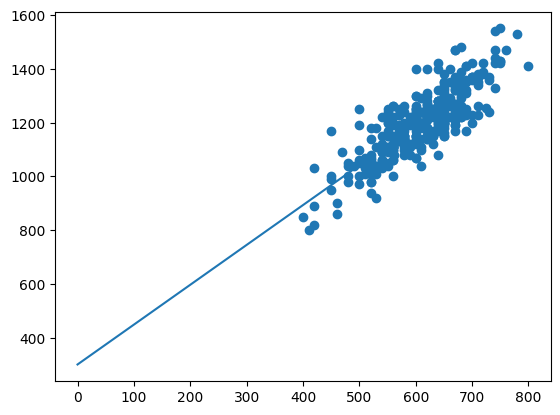

In [49]:
x = np.arange( 0,500,1)
plt.scatter(data["MathSAT"],data["SAT"])
plt.plot(x,f(x))

plt.show()

Now let us calculate the sum of the squared residuals between the observed 'MathSAT' values and the predicted values from above functions.

In [50]:
#Sum of squared residuals
residualsSquareSum = 0
for i in range(0, len(data['SAT'])):
    residualsSquareSum = residualsSquareSum + (f(data['SAT'][i]) - data['MathSAT'][i])**2
    
residualsSquareSum

792923338.5595489

# Non-linear Regression

Since the year is represented at classificaion, I'll translate into number. Another row that we'll use is still SAT. Let's make an intial assumption that their funtion is quadtric.

In [51]:
year = []

for i in range(len(data['Year'])):
    if (data['Year'][i] == "Freshman" or data['Year'][i] == "FirstYear"):
        year.append(1)
    elif (data['Year'][i] == "Sophomore"):
        year.append(2)
    elif (data['Year'][i] == "Junior"):
        year.append(3)
    elif (data['Year'][i] == "Senior"):
        year.append(4)
    else:
        year.append(0)

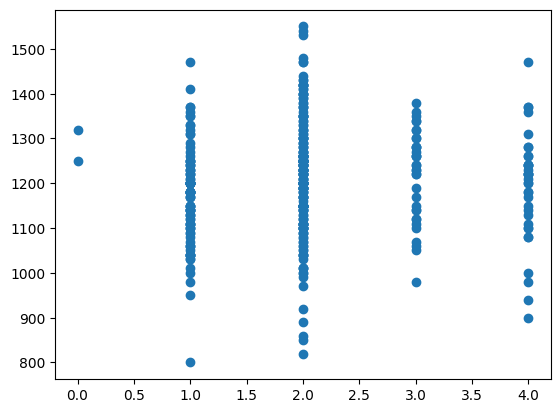

In [52]:
plt.scatter(year, data['SAT'])
plt.show()

When we see the above scatter plot we can see that the Sophomore students tend to give more SAT and also tend to score higher.

In [53]:
from pandas._libs.tslibs.offsets import YearBegin
# Convert the 'Year' column from string to integer
data['SAT'] = data['SAT'].astype(int)

# Convert the 'Year' column from strings to numbers using the dictionary
def convert_year(year):
  if (year == "Freshman" or year == "FirstYear"):
        return 1
  elif (year == "Sophomore"):
      return 2
  elif (year == "Junior"):
      return 3
  elif (year == "Senior"):
      return 4
  else:
      return 0
data['Year'] = data['Year'].apply(convert_year)
# Calculate the necessary sums
n = len(data['SAT'])
sum_y = sum(data['Year'])
sum_y2 = sum(data['Year']**2)
sum_sy = sum(data['SAT']*data['Year'])
sum_sy2 = sum(data['SAT']*data['Year']**2)

# Create the 4x4 matrix
matrix = [[n, sum_y, sum_y2, sum_y**3],
          [sum_y, sum_y2, sum_y**3, sum_y**4],
          [sum_y2, sum_y**3, sum_y**4, sum_y**5],
          [sum_y**3, sum_y**4, sum_y**5, sum_y**6]]

# Create the vector of constants
constants = [sum(data['SAT']), sum_sy, sum_sy2, sum_y**2*sum_sy2]

# Solve the matrix equation
coeffs = np.linalg.solve(matrix, constants)

# Print the coefficients
print("Coefficients:", coeffs)

Coefficients: [ 2.91116817e+03  2.32539718e+00  1.15424197e+00 -1.57902433e-03]


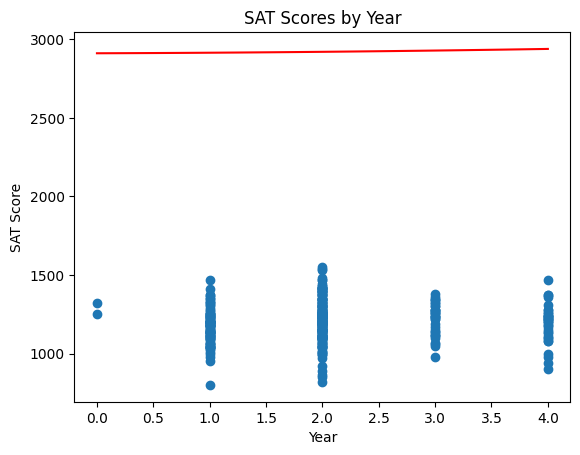

In [54]:
# Creating the regression line
x = np.linspace(min(data['Year']), max(data['Year']), 100)
y = coeffs[0] + coeffs[1]*x + coeffs[2]*x**2 + coeffs[3]*x**3

# Plotting the data and regression in the same window
plt.scatter(data['Year'], data['SAT'])
plt.plot(x, y, color='red')
plt.xlabel('Year')
plt.ylabel('SAT Score')
plt.title('SAT Scores by Year')
plt.show()

As the relationship between Year and SAT score is nonlinear and assumed that it is quadratic that might be the reason why the red line is going extend beyond the higher SAT score than what is in the data. 